<a href="https://colab.research.google.com/github/NoteAP00/basic-machine-learning-using-scikit-learn/blob/master/gdp4c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/NoteAP00/basic-machine-learning-using-scikit-learn/master/gdp4c.csv',index_col=0)

In [42]:
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [43]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [44]:
df.describe()

,SGP,THA,USA,VNM
count,5.800000e+01,5.800000e+01,5.800000e+01,3.300000e+01
mean,8.043585e+10,1.227440e+11,6.991516e+12,6.878553e+10
std,1.007247e+11,1.353708e+11,5.857794e+12,6.664636e+10
min,7.044623e+08,2.760747e+09,5.433000e+11,6.293305e+09
25%,5.320927e+09,1.399794e+10,1.583852e+12,2.465747e+10
50%,2.788040e+10,6.695904e+10,5.455160e+12,3.506411e+10
75%,9.937334e+10,1.719910e+11,1.137740e+13,1.060150e+11
max,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [45]:
df.shape

(58, 4)

In [46]:
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

In [47]:
df.dtypes

SGP    float64
THA    float64
USA    float64
VNM    float64
dtype: object

<Axes: ylabel='THA'>

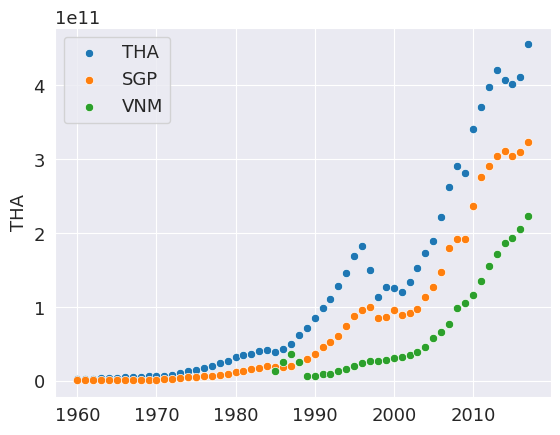

In [48]:
sns.set_style('darkgrid')
sns.scatterplot(df.THA,label='THA')
sns.scatterplot(df.SGP,label='SGP')
sns.scatterplot(df.VNM,label='VNM')

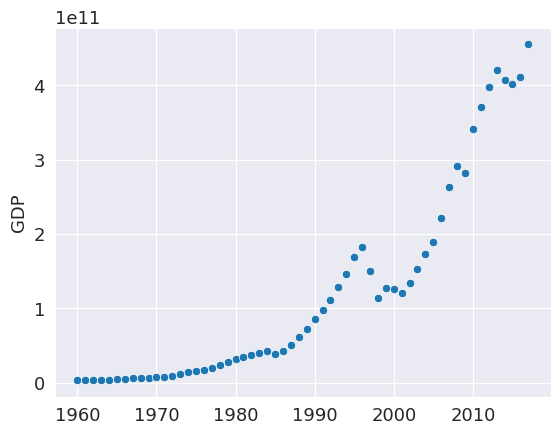

In [49]:
plt.rcParams.update({'font.size':13})
sns.set_style('darkgrid')
sns.scatterplot(df.THA)
plt.ylabel('GDP')

plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
x = df.index.values.reshape(-1,1)
y = df.THA

In [52]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

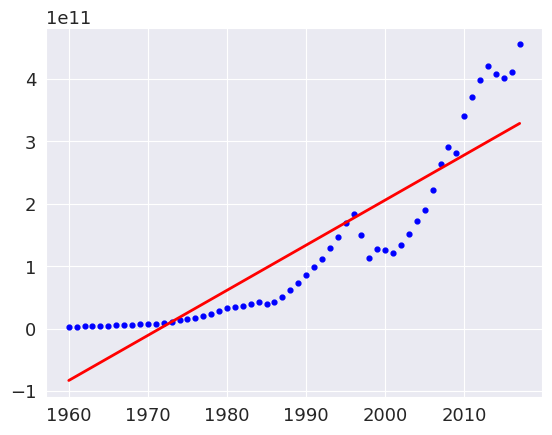

In [53]:
y_predict = model.predict(x)

plt.scatter(x,y,color='b',s=12)
plt.plot(x,y_predict,linewidth='2',color='r')

plt.show()

In [54]:
model.score(x,y)

0.8129995489142148

In [55]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [56]:
mean_squared_error(y,y_predict)

3.3677460405917047e+21

In [57]:
mean_absolute_error(y,y_predict)

48790601316.37214

In [58]:
import numpy as np
np.sqrt(mean_squared_error(y,y_predict))

58032284468.14501

In [61]:
y_predict = model.predict([[2020]])
y_predict[0]

350427351988.59375

In [64]:

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

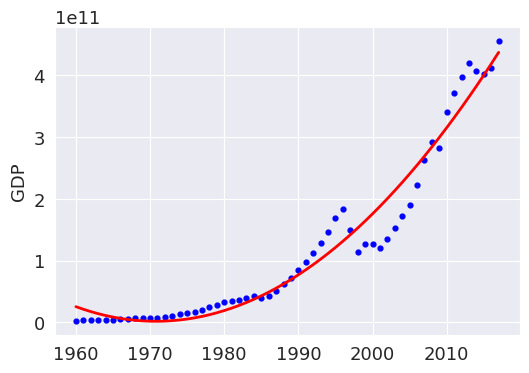

In [66]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=6,4

plt.scatter(x,y,color='b',s=12)
plt.plot(x,y_poly_pred,linewidth='2',color='r')
plt.ylabel('GDP')

plt.show()

In [68]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
import numpy as np

print('R2 = {:.5f}'.format(model.score(x_poly,y)))
print('R2 = {:.5f}'.format(r2_score(y,y_poly_pred)))

print('MSE = {:.4e}'.format(mean_squared_error(y,y_poly_pred)))
print('RMSE = {:.4e}'.format(np.sqrt(mean_squared_error(y,y_poly_pred))))

R2 = 0.95797
R2 = 0.95797
MSE = 7.5696e+20
RMSE = 2.7513e+10
